## Math 157: Intro to Mathematical Software
## UC San Diego, winter 2018

## Odds and ends

Administrivia:

- Please fill out the [week 4 questionnaire](https://docs.google.com/forms/d/e/1FAIpQLSeecb_KR5QHZWGxJcISzQuKG-F9fFJzfvE_K1-v7ctk2piT_Q/viewform?usp=sf_link).
- We are continuing to monitor the course waitlist. If you are on it and still want to join the course, please continue to keep up with lectures and homework, and watch your email for further instructions.
- Here (again) is precise link for the [documentary screening next Monday](http://physicalsciences.ucsd.edu/programs/research-communications/mathcomm_eremenko_flier1.pdf).

Added in class:
- HW 2 scores are posted on TritonEd. You should have feedback in your course project either now or shortly.
- As usual, virtual office hours take place 3-7pm today, with the homework due at 8pm.
- In case you lost track, the course syllabus is posted at http://math.ucsd.edu/~kedlaya/math157. (This is also linked from the math department's list of course web sites.)


### Notes on the homework

Problem 3b: The method `QR` of a Sage matrix does not have identical behavior to the MATLAB function; try them side-by-side to see what I mean. Also, Sage may have trouble solving an overdetermined system of equations; you might need to discard the extra equations before solving.

Problem 6c: The definition of the binary height (in order to agree with the Python code) should have been
    $$
    \lfloor \log_2 r \rfloor + 1 + \lfloor \log_2 s \rfloor + 1.
    $$
There is only a difference if one of $r$ or $s$ is a power of 2; this should not have a material impact on the rest of the problem.

Problem 6d: The exact output of the code is subject to some random variation. What I what you to explain is the relative *size* of the two return values.

### Notes on the final project

Several of you have asked about the "final project" which is worth 20% of the course grade. This will be formally assigned later in the quarter (sometime during week 7 or 8), but here is a quick preview of what to expect.

The final project will consist of two parts, each of equal weight (so each one contributes 10% to your course grade).

Part 1 will be a problem set similar in style to the ones from earlier in the term, except that it will be cumulative over the whole quarter. Grading criteria will be problem-by-problem as usual.

Part 2 will be open-ended: you will be asked to do the following.
 - Choose a topic subject to some constraints. These constraints will be described in the formal assignment.
 - Prepare a 20-30 minute presentation, a three-problem exercise set, and a solution key in the style of this course (each using a Jupyter notebook).
 - After being assigned randomly into a foursome of students, deliver your presentation to the other three students. There will be no lectures on March 12 or March 14; please use these hours to schedule your presentations.
 - If you want, give constructive feedback about the presentations, and revise your own project.
 - Submit, in addition to your presentation and exercises, your comments on the presentation and exercises from the other students in your foursome. (This need not be the same as the feedback you gave in the previous step.

You will be graded on the following criteria:
 - Presentation:
   - Completeness: Did you include enough material for 20-30 minutes? Is your material at a suitable depth?
   - Correctness: Do your examples work?
   - Exposition: Does your text actually explain what is going on?
 - Exercise set and solution key:
   - Completeness: Did you include enough material for three exercises? Is your material at a suitable depth?
   - Correctness: Are your solutions correct?
   - Exposition: Do your problems serve to elucidate your chosen topic?
 - Comments:
   - Thoroughness: Did you provide comments on all of your assigned presentations?
   - Thoughtfulness: Were you paying attention? Are your comments germane?


### Notes on timing

The last lecture included an example of measuring the time it takes for a function to run. Here are some additional comments on how to do this.

To begin with, let's say we are trying to measure the efficiency of the following function. (This is not the most intelligent way to do this particular computation, but never mind.)

In [1]:
def sin_sum(n):
    """
    Return the "sum"  sin(1) + sin(2) + ... + sin(n-1)
    """
    return sum(float(sin(m)) for m in xrange(1,n))

In [2]:
print(sin_sum(50000))

1.43152600417


We've already seen the `timeit` function.

In [3]:
timeit('sin_sum(50000)')

5 loops, best of 3: 5.1 s per loop


In [4]:
timeit('sin_sum(50000)', number=10) # Force a specific number of iterations


10 loops, best of 3: 4.75 s per loop


Warning: Sage's `timeit` command is based on Python's `timeit.timeit` command but is not identical (it is better in some ways).

The python `time` module provides lots of useful commands. One of them is `time.time`, which returns the number of seconds since a certain reference time called "the epoch". (When was that exactly?)

In [5]:
import time
t = time.time()
sin_sum(50000)
t = time.time() - t
print( "elapsed time: " + str(t))

elapsed time: 3.82931208611


The `time` module also includes some other functions for doing things like time zone conversions. A closely related module is `datetime` which has functionality for things like converting dates between different formats; I use this on my personal web site for [dynamic conference listings](http://kskedlaya.org/confs.cgi).

In some situations, you may want to keep track of the difference between *CPU time*, the amount of time that a processor is being engaged, and *wall time*, the amount of time that you experience in real life. Differences between the two could come from communication lags, other activity on the processor, etc.

In [12]:
t = cputime()
sin_sum(50000)
print(cputime()-t)

2.711331


In [13]:
t = walltime()
sin_sum(50000)
print(walltime()-t)

3.28448796272


For more involved functions, you may wish to make use of a *profiler* to find out exactly where your code is spending most of its execution time. Sage provides one called `prun`, but I won't demonstrate that here (it doesn't work so well in the notebook; try it in a Sage worksheet instead).

### Preview: combinatorics in Python (itertools)

Next week, we will discuss some of Sage's (extensive) functionality for combinatorics. As a warmup for this, I would like to point out some very useful functionality available in Python via the [`itertools` module](https://docs.python.org/2/library/itertools.html).

In [15]:
import itertools

We start with the Cartesian product. The command `itertools.product` returns an iterator, which one can convert into a list...

In [16]:
list(itertools.product([1,2],[3,4],[5,6]))

[(1, 3, 5),
 (1, 3, 6),
 (1, 4, 5),
 (1, 4, 6),
 (2, 3, 5),
 (2, 3, 6),
 (2, 4, 5),
 (2, 4, 6)]

... or use by itself in a `for` loop or a list comprehension.

In [17]:
l = [t for t in itertools.product([1,2,3,4],repeat=4) if sum(t) == 7]
l

[(1, 1, 1, 4),
 (1, 1, 2, 3),
 (1, 1, 3, 2),
 (1, 1, 4, 1),
 (1, 2, 1, 3),
 (1, 2, 2, 2),
 (1, 2, 3, 1),
 (1, 3, 1, 2),
 (1, 3, 2, 1),
 (1, 4, 1, 1),
 (2, 1, 1, 3),
 (2, 1, 2, 2),
 (2, 1, 3, 1),
 (2, 2, 1, 2),
 (2, 2, 2, 1),
 (2, 3, 1, 1),
 (3, 1, 1, 2),
 (3, 1, 2, 1),
 (3, 2, 1, 1),
 (4, 1, 1, 1)]

This is an example of enumerating *partitions*, the ways to split a certain number up as a sum. We'll see some functionality for this in Sage later.

One very handy use of this construction is to make a nested `for` loop where you *do not know* in advance how many loops there will be!

In [18]:
def f(n):
    for t in itertools.product([0,1], repeat=n):
        print(t)
        
f(3)

(0, 0, 0)
(0, 0, 1)
(0, 1, 0)
(0, 1, 1)
(1, 0, 0)
(1, 0, 1)
(1, 1, 0)
(1, 1, 1)


There are also special functions for permutations and combinations.

In [19]:
list(itertools.permutations([1,2,3]))

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

In [20]:
list(itertools.permutations([1,2,3,4],2)) # Order matters!

[(1, 2),
 (1, 3),
 (1, 4),
 (2, 1),
 (2, 3),
 (2, 4),
 (3, 1),
 (3, 2),
 (3, 4),
 (4, 1),
 (4, 2),
 (4, 3)]

In [21]:
list(itertools.permutations([1,1,2,3])) # Beware of permutations of a list with repeated entries.

[(1, 1, 2, 3),
 (1, 1, 3, 2),
 (1, 2, 1, 3),
 (1, 2, 3, 1),
 (1, 3, 1, 2),
 (1, 3, 2, 1),
 (1, 1, 2, 3),
 (1, 1, 3, 2),
 (1, 2, 1, 3),
 (1, 2, 3, 1),
 (1, 3, 1, 2),
 (1, 3, 2, 1),
 (2, 1, 1, 3),
 (2, 1, 3, 1),
 (2, 1, 1, 3),
 (2, 1, 3, 1),
 (2, 3, 1, 1),
 (2, 3, 1, 1),
 (3, 1, 1, 2),
 (3, 1, 2, 1),
 (3, 1, 1, 2),
 (3, 1, 2, 1),
 (3, 2, 1, 1),
 (3, 2, 1, 1)]

In [22]:
list(itertools.combinations([1,2,3,4], 2)) # Order doesn't matter!

[(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]

In [23]:
list(itertools.combinations_with_replacement([1,2,3,4], 2))

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 2),
 (2, 3),
 (2, 4),
 (3, 3),
 (3, 4),
 (4, 4)]

The following example is inspired by page 2 of [this restaurant menu I encountered in Palo Alto](https://wixlabs-pdf-dev.appspot.com/assets/libs/pdfjs/web/viewer.html?file=%2Fpdfproxy%3Finstance%3Dx1N3941hjC85GLW2X7stmD0pRRqc_Dgp1mH07fnaIHQ.eyJpbnN0YW5jZUlkIjoiMTJkYzJmNWYtNDAxNi00ZDI2LWE1MjgtZmMyNDllZTQxODY0IiwiYXBwRGVmSWQiOiIxM2VlMTBhMy1lY2I5LTdlZmYtNDI5OC1kMmY5ZjM0YWNmMGQiLCJzaWduRGF0ZSI6IjIwMTgtMDItMDJUMDc6NDY6MjEuNzUxWiIsInVpZCI6bnVsbCwiaXBBbmRQb3J0IjoiNzYuMTc2LjI1LjI1Mi80OTIwNCIsInZlbmRvclByb2R1Y3RJZCI6bnVsbCwiZGVtb01vZGUiOmZhbHNlLCJhaWQiOiJlMDg3MDVkNi1kN2QzLTRmNTMtYWY5Mi1hNWJkMWZkODVjMWIiLCJiaVRva2VuIjoiMTljNGY5NmQtOTg0Mi0wYjQ5LTE2YWUtZjg5ZmJhNDRkYjFhIiwic2l0ZU93bmVySWQiOiI1YWQ3YmUzNi1mNDg2LTRiYzUtOWI2OS00OTBjNzQ1MTkzYmIifQ%26compId%3Dcomp-j8hp8apu%26url%3Dhttps%3A%2F%2Fmedia.wix.com%2Fugd%2F5ad7be_7d03a925ca234fea9d437ffc09bd90b7.pdf#page=1&links=true&originalFileName=PA%20sol%20lunch&allowDownload=true&allowPrinting=true).

In [24]:
list(itertools.combinations_with_replacement(('chile relleno', 'enchilada', 'taco', 'tostada', 'quesadilla'), 2))

[('chile relleno', 'chile relleno'),
 ('chile relleno', 'enchilada'),
 ('chile relleno', 'taco'),
 ('chile relleno', 'tostada'),
 ('chile relleno', 'quesadilla'),
 ('enchilada', 'enchilada'),
 ('enchilada', 'taco'),
 ('enchilada', 'tostada'),
 ('enchilada', 'quesadilla'),
 ('taco', 'taco'),
 ('taco', 'tostada'),
 ('taco', 'quesadilla'),
 ('tostada', 'tostada'),
 ('tostada', 'quesadilla'),
 ('quesadilla', 'quesadilla')]

In addition to these combinatorial operations, the `itertools` module includes various tools for efficiently dealing with iterators. These have the advantage over more naive solutions of being much more conservative with memory usage.

For example, the `izip` function may be useful for making list plots with very large numbers of sample points, since it avoids the overhead of creating a new list of ordered pairs.

In [25]:
list(itertools.izip([1,2,3,4],[5,6,7,8]))

[(1, 5), (2, 6), (3, 7), (4, 8)]

In [26]:
# The ODE example from Monday, revisited.
import numpy as np

def calc_derivative(ypos, time):
    return -2 * ypos

n = 100
from scipy.integrate import odeint
time_vec = np.linspace(0, 4, n)
y = odeint(calc_derivative, y0=1, t=time_vec)

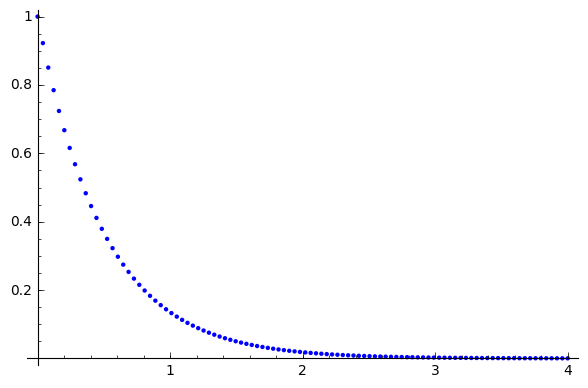

In [27]:
point(itertools.izip(time_vec, y))

The `itertools` documentation includes numerous examples of 'recipes' that combine these tools in interesting ways. For example...

In [28]:
import random

In [29]:
def random_permutation(iterable, r=None):
    "Random selection from itertools.permutations(iterable, r)"
    pool = tuple(iterable)
    r = len(pool) if r is None else r
    return tuple(random.sample(pool, r))

### Turning to Sage...

Here are some of the ways Sage can do better than Python alone in terms of combinatorial operations.

In [30]:
list(Permutations([1,2,3,3])) # Repeated entries now handled correctly!

[[1, 2, 3, 3],
 [1, 3, 2, 3],
 [1, 3, 3, 2],
 [2, 1, 3, 3],
 [2, 3, 1, 3],
 [2, 3, 3, 1],
 [3, 1, 2, 3],
 [3, 1, 3, 2],
 [3, 2, 1, 3],
 [3, 2, 3, 1],
 [3, 3, 1, 2],
 [3, 3, 2, 1]]

In one of the previous examples, we enumerated the ways to write 7 as a sum of four integers, each in the range from 1 to 4 (inclusive). Sage can do this directly!

In [31]:
list(Partitions(7, length=4, min_part=1, max_part=4)) # Here, order is not considered significant.

[[4, 1, 1, 1], [3, 2, 1, 1], [2, 2, 2, 1]]

### Weighted integer vectors

Three variations on a theme:
- In the US, the most common denominations of coins are 1 cent (penny), 5 cents (nickel), 10 cents (dime), and 25 cents (quarter). In what ways can one assemble coins worth a total of 37 cents?

In [32]:
W = WeightedIntegerVectors(37, [1,5,10,25])
list(W)

[[2, 0, 1, 1],
 [2, 2, 0, 1],
 [7, 1, 0, 1],
 [12, 0, 0, 1],
 [2, 1, 3, 0],
 [7, 0, 3, 0],
 [2, 3, 2, 0],
 [7, 2, 2, 0],
 [12, 1, 2, 0],
 [17, 0, 2, 0],
 [2, 5, 1, 0],
 [7, 4, 1, 0],
 [12, 3, 1, 0],
 [17, 2, 1, 0],
 [22, 1, 1, 0],
 [27, 0, 1, 0],
 [2, 7, 0, 0],
 [7, 6, 0, 0],
 [12, 5, 0, 0],
 [17, 4, 0, 0],
 [22, 3, 0, 0],
 [27, 2, 0, 0],
 [32, 1, 0, 0],
 [37, 0, 0, 0]]

- When McDonald's first introduced Chicken McNuggets in the US in 1983, they were sold in boxes of 6, 9, and 20 pieces. In what ways could one order a total of 87 pieces?

In [33]:
W = WeightedIntegerVectors(87, [6, 9, 20])
list(W)

[[0, 3, 3], [3, 1, 3], [1, 9, 0], [4, 7, 0], [7, 5, 0], [10, 3, 0], [13, 1, 0]]

- In American football (e.g., the Super Bowl this Sunday), the most common scoring plays (excluding two-point conversions to keep this simple) are touchdown (7 points), field goal (3 points), and safety (2 points). In what ways could one obtain a total of 31 points?

In [34]:
W = WeightedIntegerVectors(31, [2,3,7])
list(W)

[[0, 1, 4],
 [2, 2, 3],
 [5, 0, 3],
 [1, 5, 2],
 [4, 3, 2],
 [7, 1, 2],
 [0, 8, 1],
 [3, 6, 1],
 [6, 4, 1],
 [9, 2, 1],
 [12, 0, 1],
 [2, 9, 0],
 [5, 7, 0],
 [8, 5, 0],
 [11, 3, 0],
 [14, 1, 0]]